# WiDS Datathon 2024 Challenge #2

https://www.kaggle.com/competitions/widsdatathon2024-challenge2

The WiDS Datathon 2024 focuses on a prediction task using a roughly 19k record dataset (split into training and test sets) representing patients and their characteristics (age, race, BMI, zip code), their diagnosis and treatment information (breast cancer diagnosis code, metastatic cancer diagnosis code, metastatic cancer treatments etc.), their geo (zip-code level) demographic data (income, education, rent, race, poverty etc), as well as climate data that tie health outcomes to external conditions. Each row in the data corresponds to a single patient and her Diagnosis Period. 

**Your task** is to predict the patient's Metastatic Diagnosis Period in the Test Dataset using the provided characteristics and information about the patient. Some data may be messy to reflect real-world data. Our expectation is that you will address messy data issues through appropriate means.

**Target**: 

metastatic_diagnosis_period: This is the period (in days) in which metastatic cancer was diagnosed. Specifically, it is relative to the fact that breast cancer has already been diagnosed. Then the breast cancer is further diagnosed as having become metastatic cancer.

## Algorithm of actions:
1. Fill in the missing values in the table.
2. Test different models to find the one that gives the best accuracy
3. To the best model from the previous step, find the best hyperparameters
4. Apply dimensionality reduction methods such as PCA

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [2]:
df.count()

patient_id                     13173
patient_race                    6516
payer_type                     11408
patient_state                  13173
patient_zip3                   13173
                               ...  
Average of Sep-18              13166
Average of Oct-18              13166
Average of Nov-18              13161
Average of Dec-18              13140
metastatic_diagnosis_period    13173
Length: 152, dtype: int64

In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,F,27.07,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382,Asian,NaN,WA,980,West,Pacific,62,F,NaN,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [4]:
#Gender == F for all partisipans
df.drop(columns=['patient_gender'], inplace = True)
df_test.drop(columns=['patient_gender'], inplace = True)

In [5]:
nan = df.isna().sum()
print(nan)

patient_id                        0
patient_race                   6657
payer_type                     1765
patient_state                     0
patient_zip3                      0
                               ... 
Average of Sep-18                 7
Average of Oct-18                 7
Average of Nov-18                12
Average of Dec-18                33
metastatic_diagnosis_period       0
Length: 151, dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode string columns
label_encoder = LabelEncoder()
string_columns = df.select_dtypes(include=['object']).columns
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,5,0,2,724,2,7,39,NaN,44,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,4,3,13,629,0,0,55,35.36,28,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,5,0,4,925,3,4,59,NaN,7,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,2,1,4,900,3,4,59,NaN,43,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,5,0,4,934,3,4,71,NaN,6,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [7]:
# Encode string columns
string_columns = df_test.select_dtypes(include=['object']).columns
for column in string_columns:
    df_test[column] = label_encoder.fit_transform(df_test[column])

df_test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,5,0,17,713,2,7,55,NaN,5,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,1,3,24,283,2,5,60,40.00,39,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,5,0,37,794,2,7,54,32.33,1,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,5,0,36,373,2,1,63,27.07,6,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382,0,3,40,980,3,4,62,NaN,25,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [8]:
nan = df.isna().sum()
print(nan)

patient_id                      0
patient_race                    0
payer_type                      0
patient_state                   0
patient_zip3                    0
                               ..
Average of Sep-18               7
Average of Oct-18               7
Average of Nov-18              12
Average of Dec-18              33
metastatic_diagnosis_period     0
Length: 151, dtype: int64


In [9]:
df.count()

patient_id                     13173
patient_race                   13173
payer_type                     13173
patient_state                  13173
patient_zip3                   13173
                               ...  
Average of Sep-18              13166
Average of Oct-18              13166
Average of Nov-18              13161
Average of Dec-18              13140
metastatic_diagnosis_period    13173
Length: 151, dtype: int64

In [10]:
import pandas as pd
from sklearn.impute import KNNImputer

# replace missing values with KNN imputations for training set

imputer = KNNImputer(n_neighbors=5)

features = df.drop("metastatic_diagnosis_period", axis=1)
target = df["metastatic_diagnosis_period"]

imputer.fit(features)
imputed_data = imputer.transform(features)

imputed_df = pd.DataFrame(imputed_data, columns=features.columns)

imputed_data_with_target = pd.concat([imputed_df, target], axis=1)
print("Missing values imputed using KNNImputer")


Missing values imputed using KNNImputer


In [11]:
# replace missing values with KNN imputations for test set
test_imputed_data = imputer.transform(df_test)

test_imputed_data = pd.DataFrame(test_imputed_data, columns=df_test.columns)

print("Missing values imputed using KNNImputer")

Missing values imputed using KNNImputer


In [12]:
test_imputed_data.to_csv("test_imputed.csv", index=False)
imputed_df.to_csv("train_imputed.csv", index=False)

In [13]:
test_imputed_data.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681.0,5.0,0.0,17.0,713.0,2.0,7.0,55.0,30.42,5.0,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212.0,1.0,3.0,24.0,283.0,2.0,5.0,60.0,40.00,39.0,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362.0,5.0,0.0,37.0,794.0,2.0,7.0,54.0,32.33,1.0,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331.0,5.0,0.0,36.0,373.0,2.0,1.0,63.0,27.07,6.0,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382.0,0.0,3.0,40.0,980.0,3.0,4.0,62.0,30.60,25.0,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [14]:
correlation = df.corr()
correlation

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
patient_id,1.000000,-0.019714,0.016665,-0.019197,0.007633,0.013425,0.018414,-0.012414,0.017436,-0.010244,...,0.008671,-0.002752,0.002067,-0.001583,-0.003934,0.002462,0.007197,0.008719,0.007175,0.002347
patient_race,-0.019714,1.000000,-0.224492,0.138827,-0.042591,-0.150140,-0.059348,0.030184,-0.017630,-0.078132,...,-0.186188,-0.034325,-0.046377,-0.107056,-0.114483,-0.141148,-0.194977,-0.212668,-0.210232,0.018954
payer_type,0.016665,-0.224492,1.000000,-0.071634,-0.033797,0.019099,-0.065290,0.284699,0.015320,0.096858,...,-0.016981,-0.100552,-0.081111,-0.054288,-0.048807,-0.044069,-0.028033,0.009253,-0.000461,-0.066019
patient_state,-0.019197,0.138827,-0.071634,1.000000,-0.398433,-0.345922,0.017910,0.033128,0.046998,-0.048169,...,-0.309704,0.144596,0.034212,-0.067396,-0.008073,-0.155910,-0.304017,-0.394959,-0.366451,0.010840
patient_zip3,0.007633,-0.042591,-0.033797,-0.398433,1.000000,0.536889,0.296106,-0.068576,-0.057966,0.026619,...,0.377617,-0.068265,0.036086,0.193081,0.054530,0.012636,0.242768,0.380101,0.341901,-0.028686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Average of Sep-18,0.002462,-0.141148,-0.044069,-0.155910,0.012636,0.345737,0.437344,-0.071932,0.038610,-0.003621,...,0.821008,0.857946,0.885260,0.886207,0.923398,1.000000,0.862796,0.700646,0.744371,0.013522
Average of Oct-18,0.007197,-0.194977,-0.028033,-0.304017,0.242768,0.592589,0.523020,-0.080114,-0.003220,0.014236,...,0.955514,0.638095,0.637781,0.737384,0.756857,0.862796,1.000000,0.949996,0.969963,0.002581
Average of Nov-18,0.008719,-0.212668,0.009253,-0.394959,0.380101,0.722495,0.504914,-0.069433,-0.036537,0.036661,...,0.947145,0.408475,0.427670,0.609182,0.609370,0.700646,0.949996,1.000000,0.988793,-0.007472
Average of Dec-18,0.007175,-0.210232,-0.000461,-0.366451,0.341901,0.653230,0.499376,-0.069253,-0.024015,0.030691,...,0.941932,0.487606,0.484177,0.626196,0.641392,0.744371,0.969963,0.988793,1.000000,-0.006696


In [ ]:
# correlation/.to_csv('correlation.csv')

In [15]:
x = imputed_df
y = df["metastatic_diagnosis_period"]

In [16]:
x.count()

patient_id           13173
patient_race         13173
payer_type           13173
patient_state        13173
patient_zip3         13173
                     ...  
Average of Aug-18    13173
Average of Sep-18    13173
Average of Oct-18    13173
Average of Nov-18    13173
Average of Dec-18    13173
Length: 150, dtype: int64

In [17]:
y.count()

13173

In [18]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
X_valid = test_imputed_data

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape)

Training set: (10538, 150) (10538,)
Testing set: (2635, 150) (2635,)
Training set: (10538, 150) (10538,)
Testing set: (2635, 150)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

# Linear Regression
linear_regression_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Decision Trees (Random Forest)
random_forest_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Gradient Boosting Machines
gradient_boosting_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Support Vector Machines (SVM)
svm_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])



# Train and evaluate each model
models = {
    'Linear Regression': linear_regression_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'Support Vector Machine': svm_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}: Root Mean Squared Error = {rmse}")

Linear Regression: Root Mean Squared Error = 89.41911576736857
Random Forest: Root Mean Squared Error = 85.56355847186418
Gradient Boosting: Root Mean Squared Error = 81.63926528563044
Support Vector Machine: Root Mean Squared Error = 123.69002597538136


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are defined

# Define the preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

# Define the models
models = {
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ]),
    # Add more models if needed
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Gradient Boosting': {
        'regressor__n_estimators': [100, 200, 300],  # Example parameter grid for Gradient Boosting
        'regressor__learning_rate': [0.01, 0.1, 0.2]  # Example parameter grid for Gradient Boosting
    },
    # Add parameter grids for other models if needed
}

# Train and evaluate each model with GridSearchCV
for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}: Root Mean Squared Error = {rmse}")
    print("Best parameters:", grid_search.best_params_)

Gradient Boosting: Root Mean Squared Error = 81.63926528563044
Best parameters: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}


In [20]:
rmse = np.sqrt(mse)
print(f"{name}: Root Mean Squared Error = {rmse}")

Gradient Boosting: Root Mean Squared Error = 81.63926528563044


In [21]:
y_pred_valid = best_model.predict(X_valid)
patient_ids = X_valid['patient_id']

# Creating a DataFrame with patient IDs and predictions
results_df = pd.DataFrame({'patient_id': patient_ids.astype(int), 'metastatic_diagnosis_period': y_pred_valid.astype(int)})

# Saving the DataFrame to a CSV file
results_df.to_csv('predictions_1.csv', index=False)

In [27]:
from tqdm import tqdm
from scipy.signal import savgol_filter

def max_min_scaler(data):
    mx = np.max(data)
    mn = np.min(data)

    if mx-mn == 0:
        scaled = np.zeros((len(data),))
    else:
        scaled = (data-mn)/(mx-mn)

    return scaled

def standardize(data):

    average = np.mean(data)
    deviation = np.std(data)

    standard = (data-average)/deviation

    return standard

In [29]:
X_train_norn = X_train.apply(max_min_scaler)
X_test_norn = X_test.apply(max_min_scaler)

X_test_stand = X_test.apply(standardize)
X_train_stand = X_train.apply(standardize)

In [30]:
X_train_stand.count()

patient_id           10538
patient_race         10538
payer_type           10538
patient_state        10538
patient_zip3         10538
                     ...  
Average of Aug-18    10538
Average of Sep-18    10538
Average of Oct-18    10538
Average of Nov-18    10538
Average of Dec-18    10538
Length: 150, dtype: int64

In [31]:
# X_train_stand.to_csv('v1.csv')

Number of components needed to explain 99% variance: 59


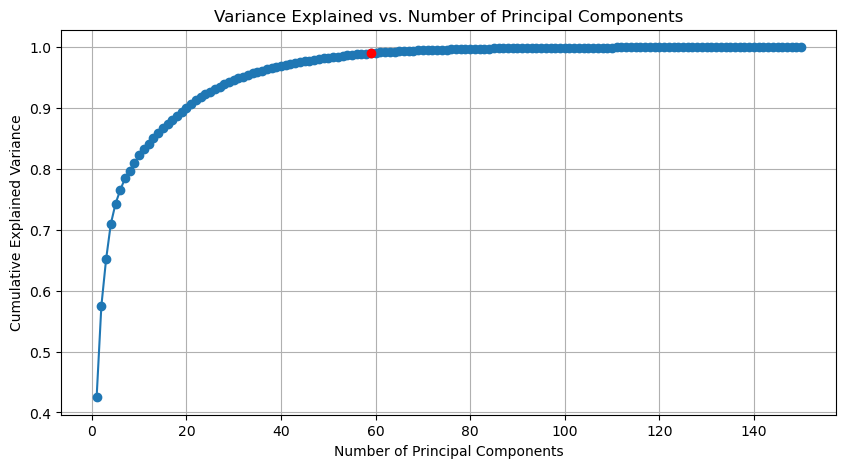

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=150)

principalComponents = pca.fit_transform(X_train_stand)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_range = np.arange(1, len(cumulative_variance) + 1)
components_80_variance = np.where(cumulative_variance >= 0.99)[0][0] + 1
print(f'Number of components needed to explain 99% variance: {components_80_variance}')


plt.figure(figsize=(10, 5))
plt.plot(n_components_range, cumulative_variance, 'o-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained vs. Number of Principal Components')

num_components = np.argmax(cumulative_variance >= 0.99) + 1
plt.plot(num_components, cumulative_variance[num_components - 1], 'ro')
plt.grid(True)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train_stand)
num_components = pca.n_components_
print(f'Number of Principal Components: {num_components}')

# Transform the training and test data
X_train_pca = pca.transform(X_train_stand)
X_test_pca = pca.transform(X_test_stand)


Number of Principal Components: 59


In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are defined

# Define the preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

# Define the models
models = {
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ]),
    # Add more models if needed
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Gradient Boosting': {
        'regressor__n_estimators': [100, 200, 300],  # Example parameter grid for Gradient Boosting
        'regressor__learning_rate': [0.01, 0.1, 0.2]  # Example parameter grid for Gradient Boosting
    },
    # Add parameter grids for other models if needed
}

# Train and evaluate each model with GridSearchCV
for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_pca, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}: Root Mean Squared Error = {rmse}")
    print("Best parameters:", grid_search.best_params_)

Gradient Boosting: Root Mean Squared Error = 88.76210666572248
Best parameters: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
